In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cement_slump.csv')
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


<Axes: >

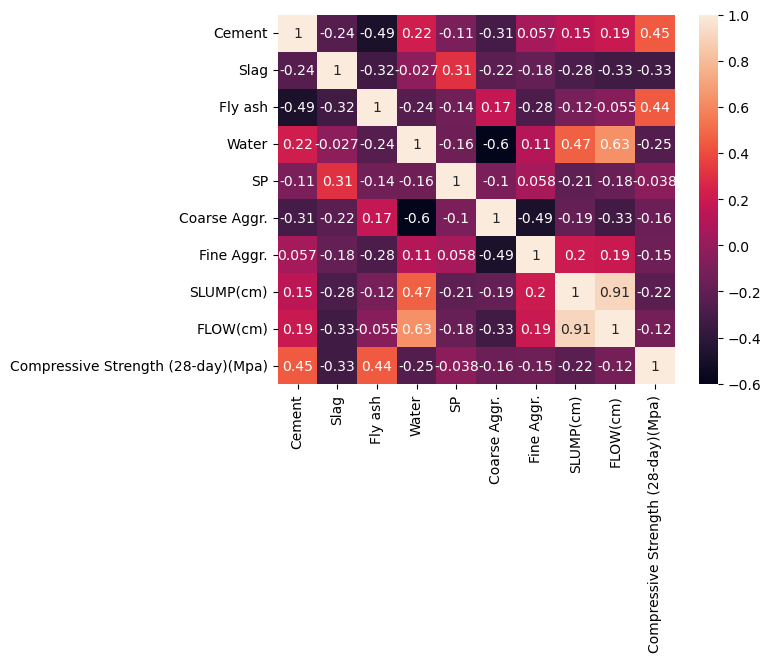

In [5]:
sns.heatmap(df.corr(), annot=True)


In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.svm import SVR ,LinearSVR
base_model = SVR()
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(x_test_scaled)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error

In [14]:
mean_absolute_error(y_test, y_pred)

5.259533818550809

In [16]:
root_mean_squared_error(y_test, y_pred)

6.672771747495873

In [ ]:
# epsilon in SVR
# Purpose: Defines a margin of tolerance in which no penalty is given for errors.
# Think of it like: “If my prediction is within ±ε of the true value, I don’t care — it’s close enough.”
# Small ε → Model tries to be more precise (fit closely to the data) → risk of overfitting.
# Large ε → Model allows a bigger margin → simpler model, possibly underfitting.
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'epsilon': [0.01, 0.1, 0.5, 1, 2]
}

In [25]:
from sklearn.model_selection import GridSearchCV


grid_model = GridSearchCV(base_model, param_grid)
grid_model.fit(X_train_scaled, y_train) 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [27]:
y_pred_grid = grid_model.predict(x_test_scaled)

In [28]:
root_mean_squared_error(y_test, y_pred_grid)

2.5199283837454667

In [29]:
mean_absolute_error(y_test, y_pred_grid)

2.019494558487902